In [1]:
!pip install psycopg2-binary sqlalchemy pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 M

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Replace with your actual credentials if different
user = "airflow"
password = "letmeinplease"
host = "postgres"      # Same as the service name in docker-compose
port = "5432"
db = "airflow"

# Create connection engine
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}")


In [4]:
df_retail = pd.read_sql("SELECT * FROM online_retail;", engine)
df_retail.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
2,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom
3,536368,22960,JAM MAKING SET WITH JARS,6,12/1/10 8:34,4.25,13047.0,United Kingdom
4,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/10 8:35,5.95,13047.0,United Kingdom


In [5]:
df_yelp = pd.read_sql("SELECT * FROM yelp_business;", engine)
df_yelp.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


In [7]:
df_retail.isna().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

In [8]:
df_yelp.isna().sum()

business_id       0
name              0
address           0
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories      103
dtype: int64

In [12]:
# Convert invoicedate column
df_retail["invoicedate"] = pd.to_datetime(df_retail["invoicedate"], format="%m/%d/%Y %H:%M", errors='coerce')

# Drop missing values and create revenue
df_retail["revenue"] = df_retail["quantity"] * df_retail["unitprice"]
df_retail["month"] = df_retail["invoicedate"].dt.to_period("M")

In [39]:
# Top and least-selling by quantity and revenue

top_qty = df_retail.groupby("description")["quantity"].sum().sort_values(ascending=False).head(10)
top_rev = df_retail.groupby("description")["revenue"].sum().sort_values(ascending=False).head(10)

df_sales = df_retail[(df_retail["quantity"] > 0) & (df_retail["revenue"] > 0)]
least_qty = df_sales.groupby("description")["quantity"].sum().sort_values().head(10)
least_rev = df_sales.groupby("description")["revenue"].sum().sort_values().head(10)

In [14]:
# Monthly trends for top products
monthly_rev = df_retail.groupby(["month", "description"])["revenue"].sum().unstack().fillna(0)
monthly_rev_top = monthly_rev[top_rev.index]

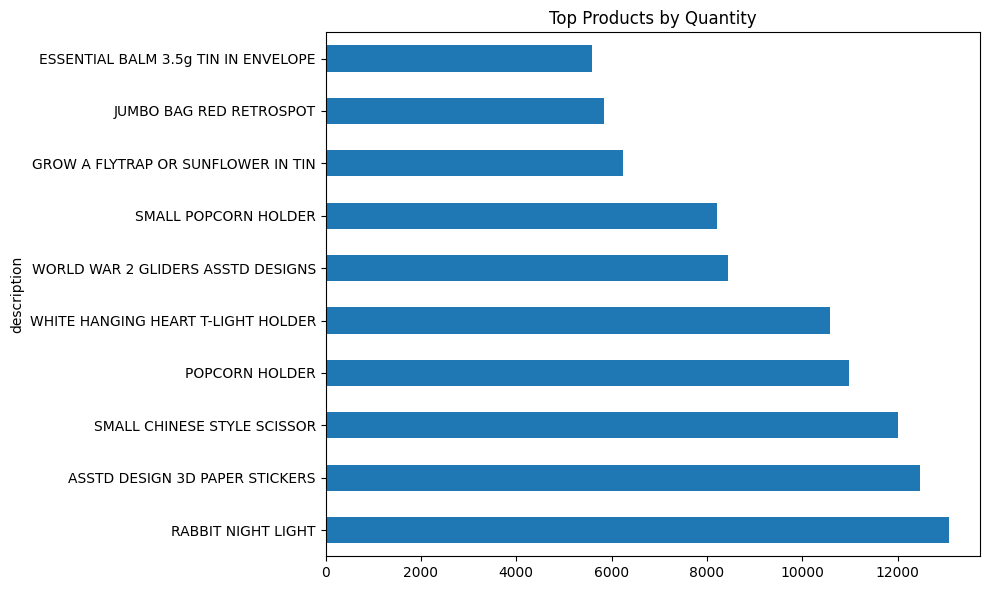

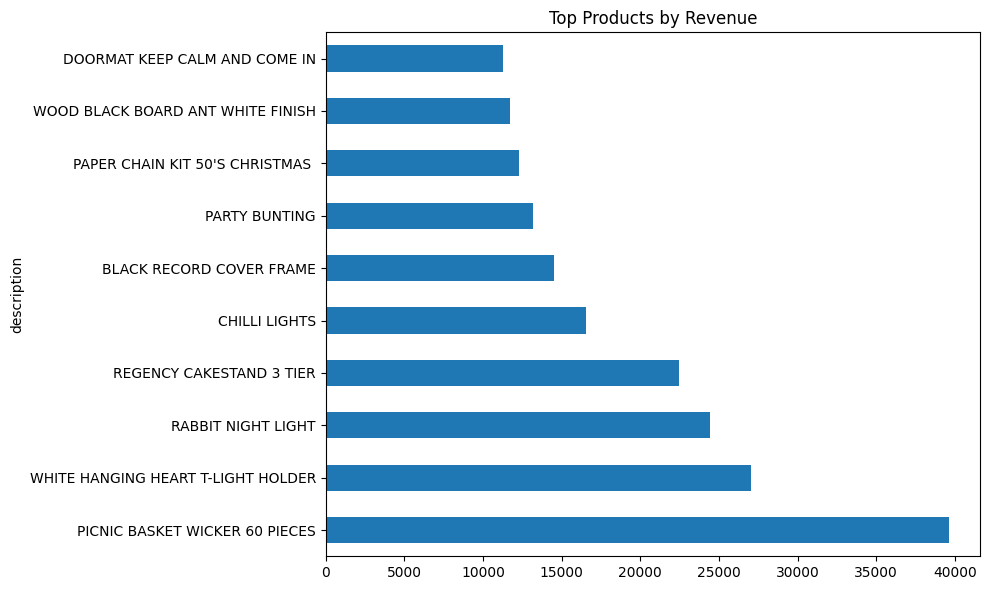

In [37]:
# Plot examples
import matplotlib.pyplot as plt

top_qty.plot(kind='barh', title="Top Products by Quantity", figsize=(10,6))
plt.tight_layout()
plt.show()

top_rev.plot(kind='barh', title="Top Products by Revenue", figsize=(10,6))
plt.tight_layout()
plt.show()

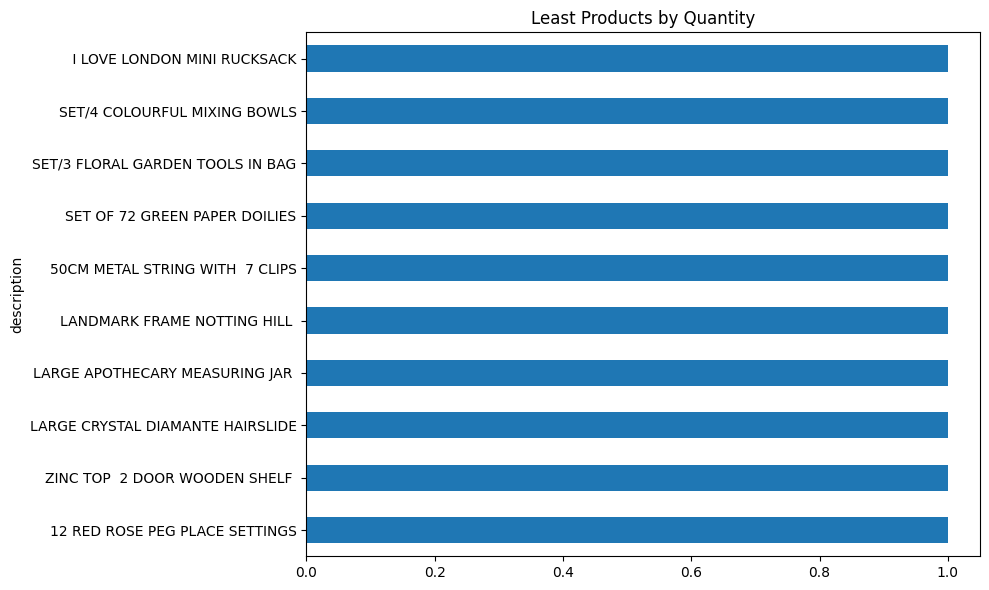

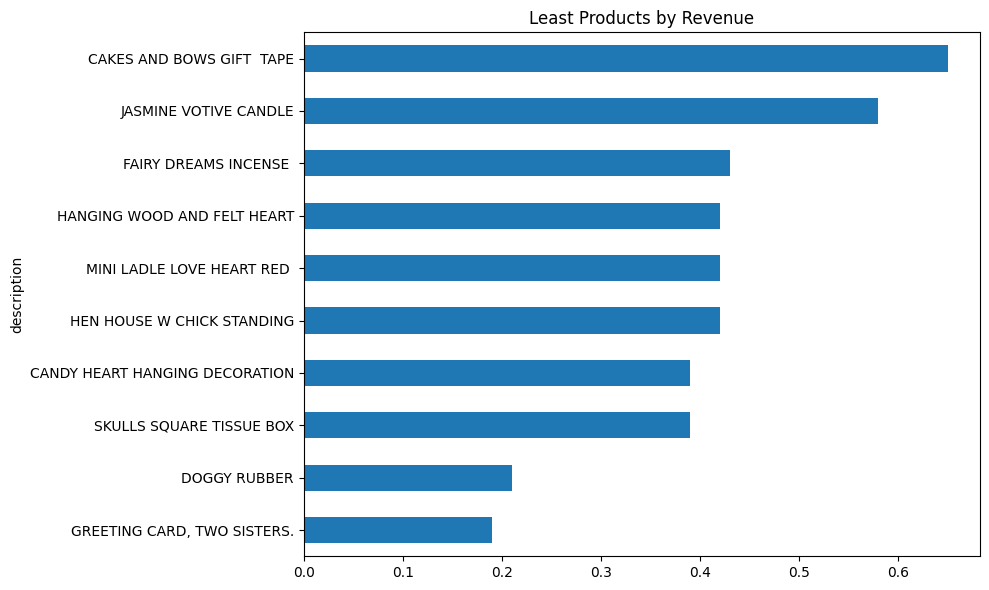

In [40]:
least_qty.plot(kind='barh', title="Least Products by Quantity", figsize=(10,6))
plt.tight_layout()
plt.show()

least_rev.plot(kind='barh', title="Least Products by Revenue", figsize=(10,6))
plt.tight_layout()
plt.show()

In [25]:
# Ensure customerid is treated as numeric (and not a string 'nan' or object)
df_retail["customerid"] = pd.to_numeric(df_retail["customerid"], errors='coerce')

# Identify canceled transactions
df_retail["is_cancelled"] = df_retail["invoiceno"].astype(str).str.startswith("C")

# Filter canceled and drop NaNs from customerid
df_cancelled = df_retail[df_retail["is_cancelled"]].dropna(subset=["customerid"]).copy()

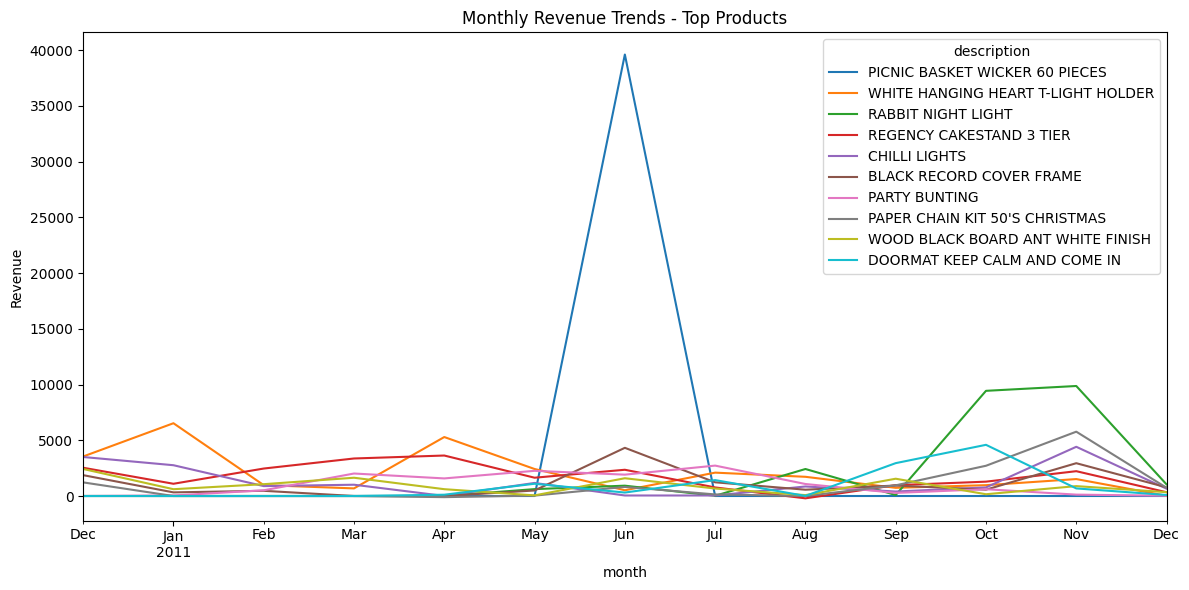

In [18]:
monthly_rev_top.plot(figsize=(12,6), title="Monthly Revenue Trends - Top Products")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

Total canceled transactions: 3836


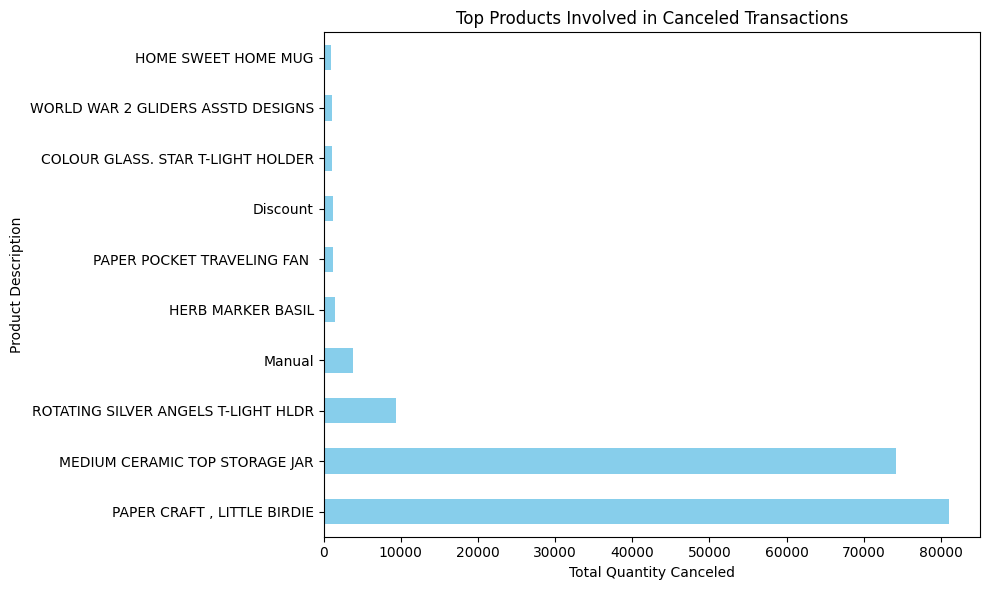

In [44]:
# Drop irrelevant columns
df_retail_cleaned = df_retail.drop(columns=["discount", "manual"], errors='ignore')

# Filter to only canceled transactions
df_canceled = df_retail_cleaned[df_retail_cleaned["is_cancelled"]]

# Count unique canceled invoice numbers
total_canceled = df_canceled["invoiceno"].nunique()
print(f"Total canceled transactions: {total_canceled}")

# Get top 10 products involved in cancellations (by quantity)
top_canceled_products = (
    df_canceled.groupby("description")["quantity"]
    .sum()
    .sort_values(ascending=True)  # Sort in ascending to make horizontal bar plot look good
    .head(10)
    .abs()  # Make quantities positive
)

# Plot
top_canceled_products.plot(
    kind="barh",
    figsize=(10, 6),
    color="skyblue"
)

plt.title("Top Products Involved in Canceled Transactions")
plt.xlabel("Total Quantity Canceled")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()


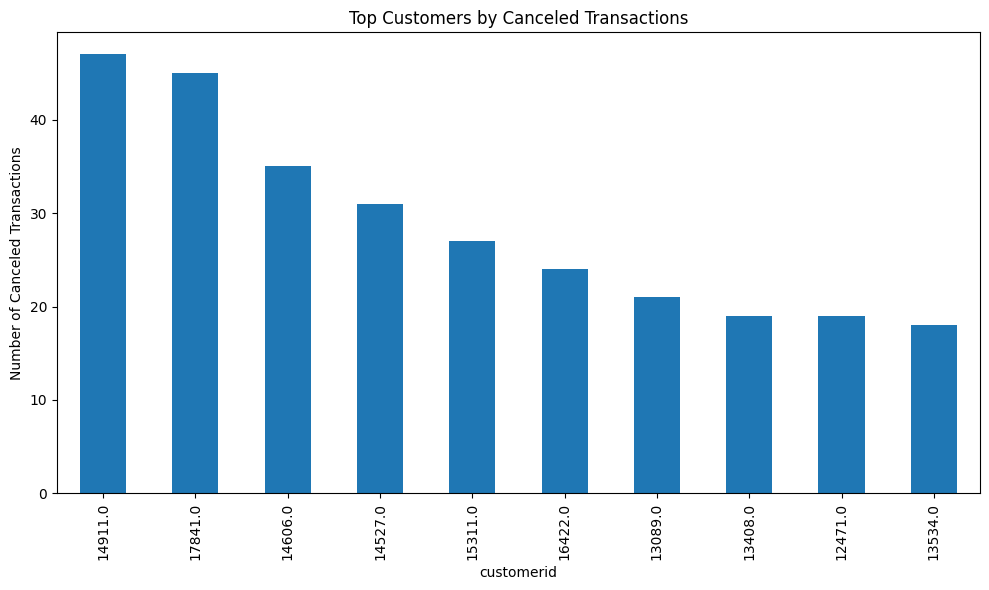

In [42]:
# Customers who cancel the most
top_canceled_customers = (
    df_retail[df_retail["is_cancelled"]]
    .groupby("customerid")["invoiceno"]
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

# Customers with Most Cancellations
plt.figure(figsize=(10, 6))
top_canceled_customers.plot(kind="bar", title="Top Customers by Canceled Transactions")
plt.ylabel("Number of Canceled Transactions")
plt.tight_layout()
plt.show()

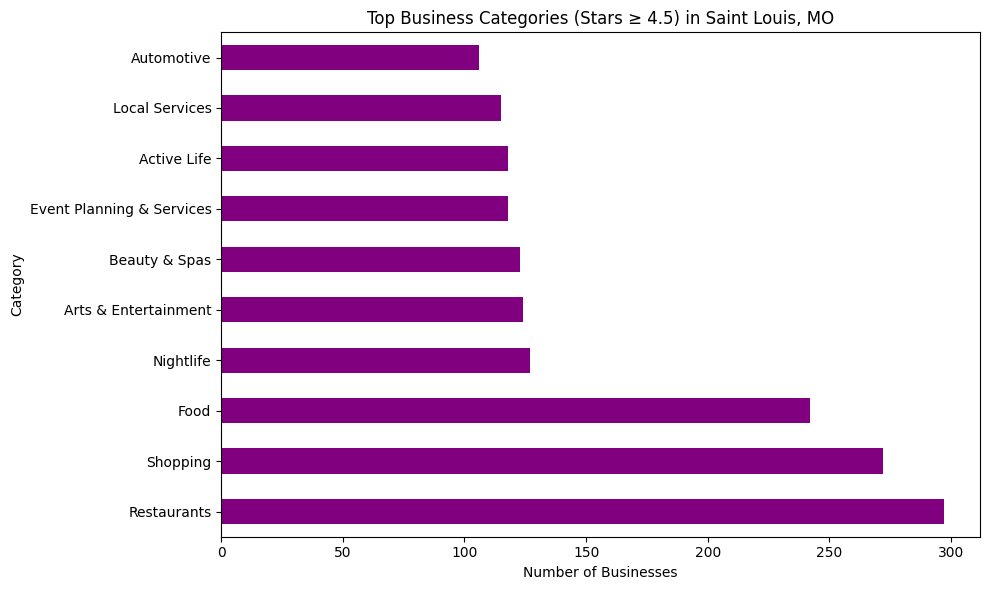

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for top-rated businesses (stars ≥ 4.5) in New York City
top_rated_nyc = df_yelp[(df_yelp["stars"] >= 4.5) & (df_yelp["city"] == "Saint Louis")]

# Break down categories into individual values
top_categories_nyc = (
    top_rated_nyc["categories"]
    .dropna()
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)

# Plot
if not top_categories_nyc.empty:
    top_categories_nyc.plot(kind="barh", figsize=(10, 6), color="purple")
    plt.title("Top Business Categories (Stars ≥ 4.5) in Saint Louis, MO")
    plt.xlabel("Number of Businesses")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()
else:
    print("No top-rated businesses found in Saint Louis, MO with the given threshold.")

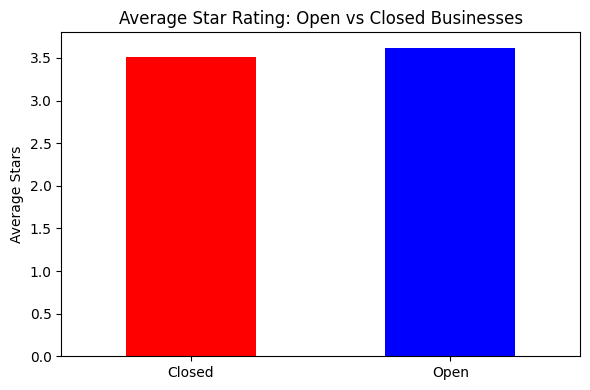

In [46]:
# Group by open status and calculate average stars
avg_stars_open_status = df_yelp.groupby("is_open")["stars"].mean()

# Rename index for clarity
avg_stars_open_status.index = ["Closed", "Open"]

# Plot
avg_stars_open_status.plot(kind="bar", color=["red", "blue"], figsize=(6, 4))
plt.title("Average Star Rating: Open vs Closed Businesses")
plt.ylabel("Average Stars")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()